<a href="https://colab.research.google.com/github/Man-asvi/ML-Projects/blob/main/Weather_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data

In [ ]:
df = pd.read_csv('/content/weather_classification_data.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [ ]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
cat_columns = df.select_dtypes(include="object")
cat_columns

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy
...,...,...,...,...
13195,overcast,Summer,mountain,Rainy
13196,cloudy,Winter,coastal,Snowy
13197,overcast,Autumn,coastal,Cloudy
13198,overcast,Winter,inland,Snowy


In [ ]:
for i in cat_columns:
    print("for "+ str(i))
    print(cat_columns[i].value_counts())

for Cloud Cover
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
for Season
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
for Location
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
for Weather Type
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [ ]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

# Data Visualisation

<Axes: xlabel='Weather Type', ylabel='count'>

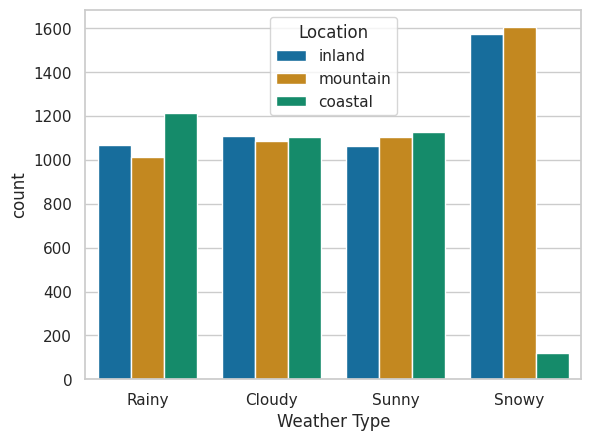

In [ ]:
sns.set(style = "whitegrid")
sns.countplot(x = "Weather Type", hue = "Location", data = df, palette="colorblind")

<Axes: xlabel='Weather Type', ylabel='count'>

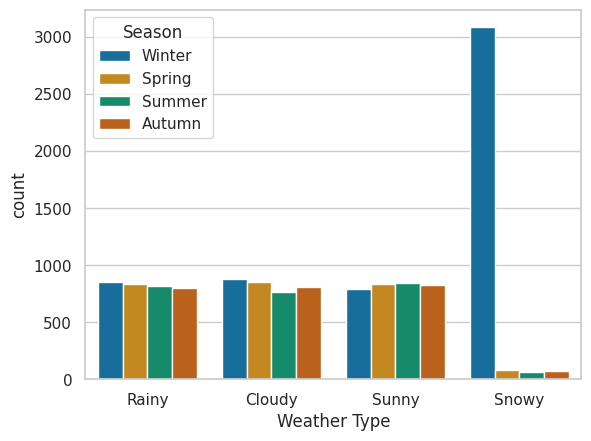

In [ ]:
sns.countplot(x = "Weather Type", hue = "Season", data = df, palette="colorblind")

<Axes: xlabel='Temperature', ylabel='Count'>

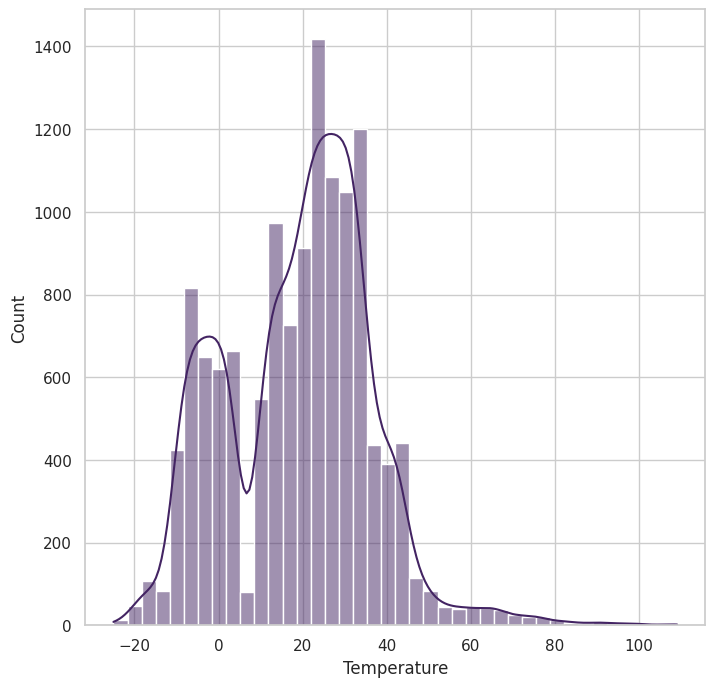

In [ ]:
plt.figure(figsize = (8,8))
sns.histplot(x = 'Temperature',bins = 40, kde = True, data= df, color = "#432463")

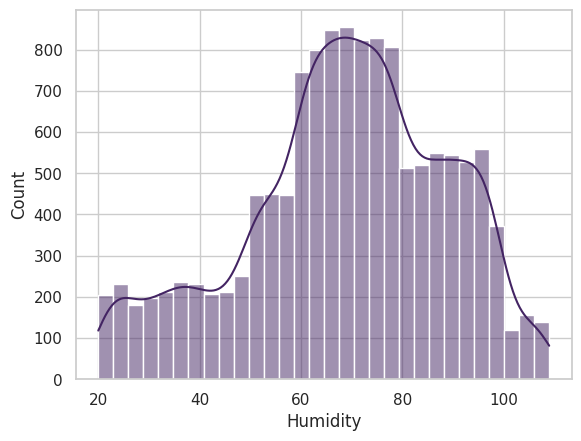

In [ ]:
sns.histplot(x = 'Humidity', bins = 30 ,kde = True, data= df, color = "#432463");

# Data Preprocessing

In [ ]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct1 = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Cloud Cover'])],
    remainder='passthrough'
)
df_trans1 = ct1.fit_transform(df)
encoder1 = ct1.named_transformers_['encoder']
encoded_col_names1 = encoder1.get_feature_names_out(['Cloud Cover'])
new_col_names1 = np.append(encoded_col_names1, df.columns)
remaining_columns1 = df.columns.drop('Cloud Cover')
new_col_names1 = np.append(encoded_col_names1, remaining_columns1)
df_trans1 = pd.DataFrame(df_trans1, columns=new_col_names1)
df = df_trans1
df.head()

,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.0,0.0,0.0,1.0,14.0,73,9.5,82.0,1010.82,2,Winter,3.5,inland,Rainy
1,0.0,0.0,0.0,1.0,39.0,96,8.5,71.0,1011.43,7,Spring,10.0,inland,Cloudy
2,1.0,0.0,0.0,0.0,30.0,64,7.0,16.0,1018.72,5,Spring,5.5,mountain,Sunny
3,1.0,0.0,0.0,0.0,38.0,83,1.5,82.0,1026.25,7,Spring,1.0,coastal,Sunny
4,0.0,0.0,1.0,0.0,27.0,74,17.0,66.0,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct2 = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Season'])],
    remainder='passthrough'
)
df_trans2 = ct2.fit_transform(df)
encoder2 = ct2.named_transformers_['encoder']
encoded_col_names2 = encoder2.get_feature_names_out(['Season'])
new_col_names2 = np.append(encoded_col_names2, df.columns)
remaining_columns2 = df.columns.drop('Season')
new_col_names2 = np.append(encoded_col_names2, remaining_columns2)
df_trans2 = pd.DataFrame(df_trans2, columns=new_col_names2)
df = df_trans2
df.head()

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Location,Weather Type
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,73,9.5,82.0,1010.82,2,3.5,inland,Rainy
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,96,8.5,71.0,1011.43,7,10.0,inland,Cloudy
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,64,7.0,16.0,1018.72,5,5.5,mountain,Sunny
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,83,1.5,82.0,1026.25,7,1.0,coastal,Sunny
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,74,17.0,66.0,990.67,1,2.5,mountain,Rainy


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct3 = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Location'])],
    remainder='passthrough'
)
df_trans3 = ct3.fit_transform(df)
encoder3 = ct3.named_transformers_['encoder']
encoded_col_names3 = encoder3.get_feature_names_out(['Location'])
new_col_names3 = np.append(encoded_col_names3, df.columns)
remaining_columns3 = df.columns.drop('Location')
new_col_names3 = np.append(encoded_col_names3, remaining_columns3)
df_trans3 = pd.DataFrame(df_trans3, columns=new_col_names3)
df = df_trans3
df.head()

,Location_coastal,Location_inland,Location_mountain,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,74,17.0,66.0,990.67,1,2.5,Rainy


In [ ]:
X = df.drop("Weather Type", axis = 1)
Y  = df["Weather Type"]

In [ ]:
X.head()

,Location_coastal,Location_inland,Location_mountain,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,14.0,73,9.5,82.0,1010.82,2,3.5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,39.0,96,8.5,71.0,1011.43,7,10.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,64,7.0,16.0,1018.72,5,5.5
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,38.0,83,1.5,82.0,1026.25,7,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,74,17.0,66.0,990.67,1,2.5


In [ ]:
Y.head()

0     Rainy
1    Cloudy
2     Sunny
3     Sunny
4     Rainy
Name: Weather Type, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.63650876, -0.76181701, -0.75144943, ...,  0.35684006,
        -0.52030043,  1.03859583],
       [-0.61105692, -0.76181701,  1.33076154, ...,  0.09988312,
        -0.52030043, -1.17127159],
       [ 1.63650876, -0.76181701, -0.75144943, ..., -0.05984687,
        -0.00342625,  0.74394684],
       ...,
       [-0.61105692,  1.31265118, -0.75144943, ...,  0.06382368,
        -0.77873751, -0.43464911],
       [-0.61105692, -0.76181701,  1.33076154, ..., -0.46478109,
        -0.26186334, -1.61324507],
       [-0.61105692, -0.76181701,  1.33076154, ...,  0.20886278,
         0.51344793,  1.03859583]])

In [ ]:
x_test

array([[-0.61105692, -0.76181701,  1.33076154, ..., -0.53075652,
        -0.77873751, -0.43464911],
       [-0.61105692, -0.76181701,  1.33076154, ...,  0.27964614,
        -1.0371746 , -0.43464911],
       [-0.61105692,  1.31265118, -0.75144943, ...,  0.54354786,
         1.54719628,  1.48056932],
       ...,
       [-0.61105692, -0.76181701,  1.33076154, ..., -0.31493406,
        -0.77873751, -0.7292981 ],
       [-0.61105692, -0.76181701,  1.33076154, ...,  0.51416609,
         1.0303221 ,  0.59662235],
       [-0.61105692,  1.31265118, -0.75144943, ...,  0.59509951,
         1.0303221 ,  0.00732437]])

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 22)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=22)

In [ ]:
print(classifier.predict(sc.transform([[0,1,0,0,0,0,1,0,0,0,1,14,73,9.5,82,1010.82,2,3.5]])))

['Snowy']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1))

[['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']
 ...
 ['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[537  68  10  15]
 [ 46 548  40  10]
 [ 17   8 636  20]
 [ 54  18  15 598]]


0.8784090909090909

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
print(classifier.predict(sc.transform([[0,1,0,0,0,0,1,0,0,0,1,14,73,9.5,82,1010.82,2,3.5]])))

['Rainy']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1))

[['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']
 ...
 ['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[559  56   8   7]
 [ 36 582  17   9]
 [ 19  14 634  14]
 [ 49  18  10 608]]


0.9026515151515152

# Kernel SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 22)
classifier.fit(x_train, y_train)

SVC(random_state=22)

In [ ]:
print(classifier.predict(sc.transform([[0,1,0,0,0,0,1,0,0,0,1,14,73,9.5,82,1010.82,2,3.5]])))

['Rainy']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1))

[['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']
 ...
 ['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[565  48   7  10]
 [ 30 593   8  13]
 [ 16  11 636  18]
 [ 43  12  10 620]]


0.9143939393939394

# Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 22)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=22)

In [ ]:
print(classifier.predict(sc.transform([[0,1,0,0,0,0,1,0,0,0,1,14,73,9.5,82,1010.82,2,3.5]])))

['Rainy']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1))

[['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']
 ...
 ['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[566  29  15  20]
 [ 31 579  20  14]
 [ 12  10 643  16]
 [ 20  17  12 636]]


0.9181818181818182

# Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 22)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=22)

In [ ]:
print(classifier.predict(sc.transform([[0,1,0,0,0,0,1,0,0,0,1,14,73,9.5,82,1010.82,2,3.5]])))

['Rainy']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(-1,1), y_test.values.reshape(-1,1)), axis=1))

[['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']
 ...
 ['Snowy' 'Snowy']
 ['Sunny' 'Sunny']
 ['Sunny' 'Sunny']]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[593  26   4   7]
 [ 34 589  14   7]
 [ 16  12 641  12]
 [ 37  22  10 616]]


0.9238636363636363